In [1]:
%load_ext autoreload
%autoreload 2 
%cd ~/arga/nerf-thesis/

/proj/nlp4adas/users/x_artga/nerf-thesis


In [21]:
from pathlib import Path

from src.diffusion import ImageToImageDiffusionModel
from src.configuration import setup_project
from src.data import load_img_paths_from_dir, read_image

config = setup_project(config_path=None)
dataset_config = config["datasets"]["pandaset"]
dataset_path = Path(dataset_config["path"])
data_path = dataset_path / dataset_config["scenes"][0] / "camera" / "front_camera"

img_paths = load_img_paths_from_dir(data_path)
ex_img = read_image(img_paths[0])

pipe = ImageToImageDiffusionModel()


/proj/nlp4adas/users/x_artga/nerf-thesis/proj_config.yml


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
print("hello")

hello


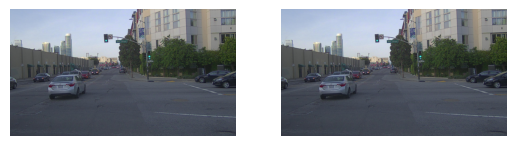

In [4]:
import matplotlib.pyplot as plt
from src.utils import show_img

# Check VAE
img_pp = pipe.pipe.image_processor.preprocess(ex_img)

plt, (ax1, ax2) = plt.subplots(1, 2)
show_img(ex_img, ax1)
show_img((img_pp[0] + 1) / 2 , ax2)

In [5]:
pipe.pipe.image_processor.config

FrozenDict([('do_resize', True),
            ('vae_scale_factor', 8),
            ('resample', 'lanczos'),
            ('do_normalize', True),
            ('do_binarize', False),
            ('do_convert_rgb', False),
            ('do_convert_grayscale', False),
            ('_use_default_values',
             ['do_convert_grayscale',
              'do_resize',
              'do_normalize',
              'do_binarize',
              'do_convert_rgb',
              'resample'])])

In [6]:
ex_img.max(), ex_img.shape, ex_img.dtype

(tensor(1.), torch.Size([3, 1080, 1920]), torch.float32)

In [7]:
img_pp.max(), img_pp.shape, img_pp.dtype

(tensor(1.), torch.Size([1, 3, 1080, 1920]), torch.float32)

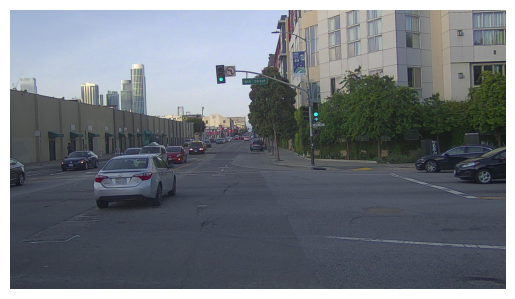

In [8]:
img_npp = pipe.pipe.image_processor.postprocess(img_pp, output_type="pt")

show_img(img_npp[0])

In [38]:
import torch
seeds = [0, 1, 2]
img_out = pipe(prompt="", image=ex_img, seeds=seeds)

3 3 3


  0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
len(img_out), img_out[0].shape, img_out.shape

(3, torch.Size([3, 1080, 1920]), torch.Size([3, 3, 1080, 1920]))

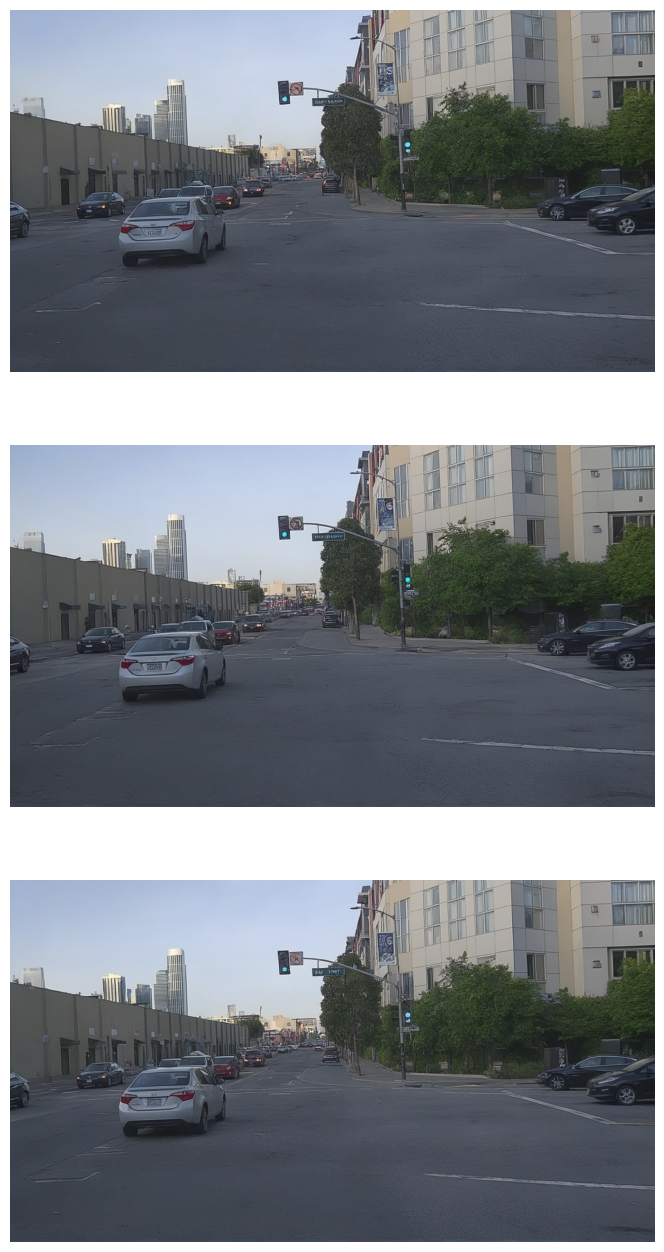

In [47]:
import matplotlib.pyplot as plt
from torch import Tensor


def show_img(img: Tensor, ax=None):
    batch_size = len(img.shape)
    if batch_size == 4:
        fig, axes = plt.subplots(img.size(0), 1, figsize=(16, 4*batch_size))
        
    elif batch_size == 3:   
        if ax is None:
            fig = plt.figure()
            ax = plt.gca()
        
        axes = [ax]
        img = img[None, ...]

    else:
        assert False
    
    if img.shape[-1] != 3:
        img = img.permute(0, 2, 3, 1)

    for ax, img in zip(axes, img):
        ax.imshow(img)
        ax.axis("off")

show_img(img_out)

In [48]:
!PYTHONPATH='.' python scripts/run_diffusion.py ~/base/master-thesis-shared/renders/radnerf/pandaset-neurad/neurad-pandaset-test-001/test/rgb/front_camera/ ~/base/master-thesis-shared/diffusions/sdxl_ref_v1_0/radnerf/pandaset-neurad/neurad-pandaset-test-001/test/rgb/front_camera/

/opt/mambaforge/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/opt/mambaforge/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/proj/nlp4adas/users/x_artga/nerf-thesis/proj_config.yml
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  8.96it/s]
